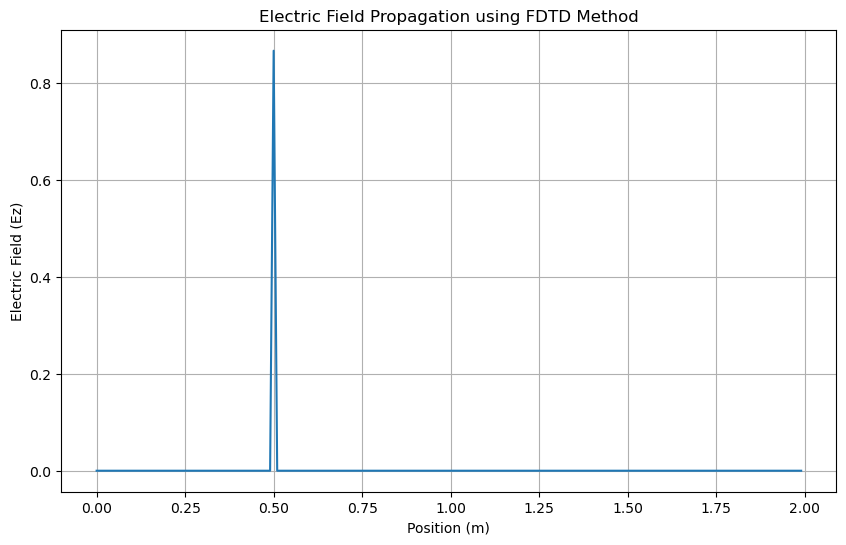

In [1]:
# Week 2 Lab: Implementing Finite Difference Time Domain (FDTD) Method for Electromagnetic Wave Propagation

# Objective: In this lab, you will implement the Finite Difference Time Domain (FDTD) method to simulate electromagnetic wave propagation.

import numpy as np
import matplotlib.pyplot as plt

# Constants and Parameters
c = 3e8  # Speed of light in vacuum (m/s)
dx = 0.01  # Spatial step size (m)
dt = dx / (2 * c)  # Temporal step size (s)
num_steps = 200  # Number of time steps
num_cells = 200  # Number of spatial cells

# Initial Electric and Magnetic Fields
Ez = np.zeros(num_cells)
Hy = np.zeros(num_cells)

# Source Parameters
source_pos = 50  # Position of the source (cell index)
source_frequency = 10e9  # Source frequency (Hz)
source_amplitude = 1.0  # Source amplitude

# Time Loop (FDTD Simulation)
for t in range(num_steps):
    # Update Magnetic Field (Hy)
    for i in range(num_cells - 1):
        Hy[i] = Hy[i] + (Ez[i + 1] - Ez[i]) * dt / (dx * c)

    # Update Electric Field (Ez)
    for i in range(1, num_cells):
        Ez[i] = Ez[i] + (Hy[i] - Hy[i - 1]) * dt * c / dx

    # Source (Hard Source)
    Ez[source_pos] = Ez[source_pos] + source_amplitude * np.sin(2 * np.pi * source_frequency * t * dt)

# Plotting the Result
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_cells) * dx, Ez)
plt.xlabel('Position (m)')
plt.ylabel('Electric Field (Ez)')
plt.title('Electric Field Propagation using FDTD Method')
plt.grid(True)
plt.show()
